<a href="https://colab.research.google.com/github/teddcp/Machine-Learning-/blob/master/Polynomial_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# POLYNOMIAL REGRESSION
------------------------------------


1. when the relationship between the predictor and repsponse variable are not linear, we can say that it is having a polynomial relationship.


2. let's say we have only one feature(x is of 1 column). Then the equation will be c + bx + ax^2 (degree 2) We can easily achieve the equation by [preporcessing](https://stackoverflow.com/q/51906274/12210002).PolynomialFeatures of SKLEARN.  


```
#   one feature, degree 2 : n=1,d=2 then we will have c(n+d,d) no.of terms.
    i.e (1,x,x^2) will be formed.

#   2 feature(x,y),degree 2 : n=2,d=2 ,then we will have c(4,2)=6 terms.
    i.e [1, x, y, x^2, y^2, xy] terms.
```

3. Then we will pass that updated feature to linear regression model as the new updated feature is still linear.

  let z1=x^2,z2=x
  putting in the above equation: c+ b * z2 + a * z1 

4. Above is a mutliple linear regression equation  which can be solved by linear regression model of SKLEARN.Then we will determine the coefficients and intercepts.


[link 1](https://towardsdatascience.com/polynomial-regression-bbe8b9d97491)
[link 2](https://towardsdatascience.com/machine-learning-polynomial-regression-with-python-5328e4e8a386)
[link 3](https://medium.com/coinmonks/polynomial-regression-11bec9262d64)
[link 4](https://realpython.com/linear-regression-in-python/#polynomial-regression-with-scikit-learn)

Extras :

[link 5](https://www.jeremyjordan.me/polynomial-regression/)
[link 6](https://www.analyticsvidhya.com/blog/2020/03/polynomial-regression-python/)
[link 7](https://jakevdp.github.io/PythonDataScienceHandbook/05.06-linear-regression.html
)
[link 8](
https://www.geeksforgeeks.org/python-implementation-of-polynomial-regression/)


















# using Employee_salary.csv 
------------------------------
[csv-link](https://github.com/teddcp/Machine-Learning-/tree/master/data-files)

## section 1 : lin. reg. model

**[for Employee_salary.csv]**

we will first implement with linear regression and then will implement the polynomial regression

### 1. importing libraries
      

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

### 2. importing the data

In [405]:
data=pd.read_csv('/content/Employee_Salary.csv')
data.head(10)

,Years of Experience,Salary
0,1.000000,40000.00000
1,2.257942,65979.42119
2,2.450875,67253.57549
3,2.498713,67342.43510
4,2.613729,70532.20448
5,2.682068,69119.79132
6,2.761983,71063.36476
7,2.927601,71356.14382
8,2.969968,74265.40359
9,3.059107,74804.11404


In [406]:
#renaming the columns
data.rename(columns={'Years of Experience': 'yoe'},inplace=True)
data.head()

,yoe,Salary
0,1.000000,40000.00000
1,2.257942,65979.42119
2,2.450875,67253.57549
3,2.498713,67342.43510
4,2.613729,70532.20448


In [455]:
data.tail()

,yoe,Salary
1995,19.178575,421534.6910
1996,19.254499,430478.0265
1997,19.353369,438090.8454
1998,19.842520,482242.1608
1999,20.000000,500000.0000


In [407]:
data['yoe'].is_monotonic_increasing,data['Salary'].is_monotonic_increasing  #checking if it is in ascending order or not

(True, False)

In [408]:
data.info()                    # no null values are there

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   yoe     2000 non-null   float64
 1   Salary  2000 non-null   float64
dtypes: float64(2)
memory usage: 31.4 KB


In [409]:
data.describe()

,yoe,Salary
count,2000.000000,2000.000000
mean,10.739095,111942.422469
std,2.989853,45055.817085
min,1.000000,40000.000000
25%,8.812255,87938.130895
50%,10.738822,93376.356875
75%,12.785483,116978.641550
max,20.000000,500000.000000


### Visualizing the data


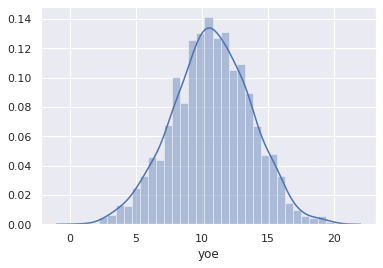

In [410]:
sns.distplot(data.yoe)

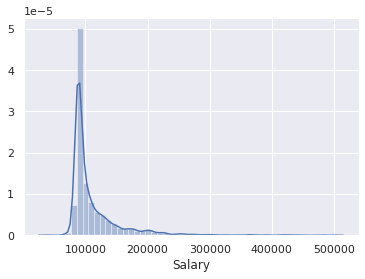

In [411]:
sns.distplot(data.Salary)

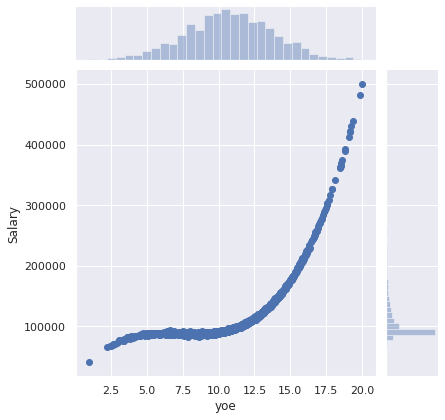

In [412]:
sns.jointplot(x='yoe',y='Salary',data=data)  # data plot is non-linear

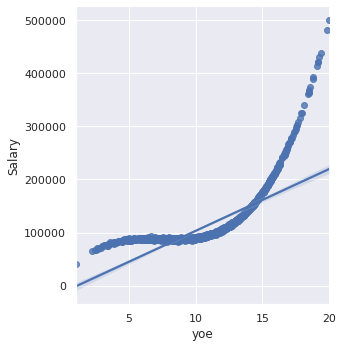

In [413]:
sns.lmplot(x='yoe',y='Salary',data=data)   #trying to fit the data with a linear model (line of best fit)  : high Bias

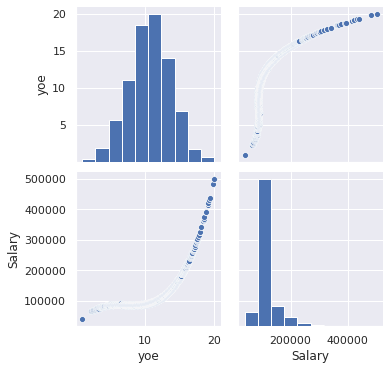

In [414]:
sns.pairplot(data)

### Splitting the data for training and testing

In [0]:
#preparing  the independent and dependent features
x=data[['yoe']]
y=data.Salary

In [0]:
from sklearn.model_selection import train_test_split as tts

In [0]:
x_train,x_test,y_train,y_test= tts(x,y,test_size=0.3,random_state=42)

### implementing with linear regression model

In [0]:
from sklearn.linear_model import LinearRegression as lr

In [419]:
lin_reg_model=lr(fit_intercept=True)
lin_reg_model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [420]:
#getting the coefficients(m) and y-intercept(b) : y=mx+b
lin_reg_model.coef_,lin_reg_model.intercept_

(array([11368.54271264]), -10426.412507427653)

In [0]:
y_pred=lin_reg_model.predict(x_test)

Text(0.5, 1.0, '\nSalary vs. Years of Experience (Training dataset)')

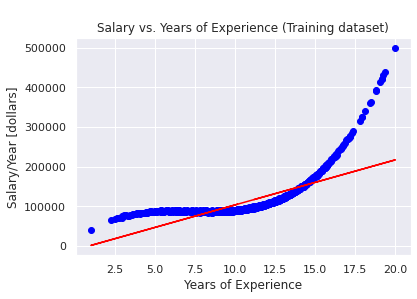

In [422]:
#plotting the  trainingdata
plt.scatter(x_train,y_train,color='blue')
plt.plot(x_train,lin_reg_model.predict(x_train),color='red')
plt.ylabel('Salary/Year [dollars]')
plt.xlabel('Years of Experience')
plt.title('\nSalary vs. Years of Experience (Training dataset)')

Text(0.5, 1.0, '\nSalary vs. Years of Experience (testing dataset)')

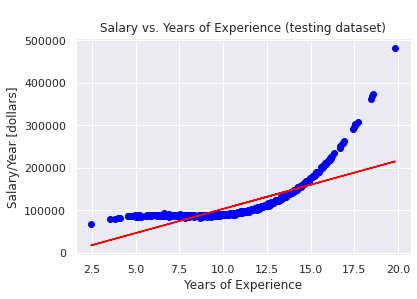

In [423]:
#plotting the  testing data
plt.scatter(x_test,y_test,color='blue')
plt.plot(x_test,y_pred,color='red')
plt.ylabel('Salary/Year [dollars]')
plt.xlabel('Years of Experience')
plt.title('\nSalary vs. Years of Experience (testing dataset)')

### checking the accuracy

In [0]:
from sklearn.metrics import r2_score,mean_squared_error as mse

In [425]:
#mean squared error
mse(y_test,y_pred)

792612729.9482301

In [426]:
# RMSE : root mse
np.sqrt(mse(y_test,y_pred))

28153.378659553993

In [427]:
#r^2
r2_score(y_test,y_pred)   # 0.62 ...

0.6263851363075901

## section 2 : poly. reg. model

implementing a ploy reg. model to the same dataset

### getting coefficients (PolynomialFeatures)

In [0]:
from sklearn.preprocessing import PolynomialFeatures as pf

In [0]:
poly=pf(degree=2,include_bias=False)  # bias is not  included here..as  fit_intercept is true in lin. regression
x_new=poly.fit_transform(x)

In [430]:
x_new  # for one feature(x) : polynomial equation : c+bx+ax^2 ,the first row represents the c,b,a

array([[  1.        ,   1.        ],
       [  2.25794198,   5.09830199],
       [  2.45087546,   6.00679053],
       ...,
       [ 19.35336879, 374.55288352],
       [ 19.84251968, 393.72558725],
       [ 20.        , 400.        ]])

In [431]:
x_new.shape # 2 dimensional

(2000, 2)

### data for training and testing

In [0]:
x_train2,x_test2,y_train2,y_test2= tts(x_new,y,test_size=0.3,random_state=42)

In [433]:
lin_reg_model2=lr(fit_intercept=True)  # intercept is false as we have already included it in polynomial features
lin_reg_model2.fit(x_train2,y_train2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [434]:
#getting the coefficients(m) and y-intercept(b) : 
lin_reg_model2.coef_,lin_reg_model2.intercept_     # intercept is present 

(array([-31875.1662435 ,   2046.77492493]), 199620.0270498672)

In [0]:
y_pred2=lin_reg_model2.predict(x_test2)

### evaluation of accurracy

In [436]:
# RMSE : root mse
np.sqrt(mse(y_test2,y_pred2))

11018.7158422882

In [437]:
#r^2
r2_score(y_test2,y_pred2)   # 0.94 ... ACCURACY IMPROVED

0.9427698256226267

### plotting the result

Text(0.5, 1.0, '\n\nSalary vs. Years of Experience (Training dataset)')

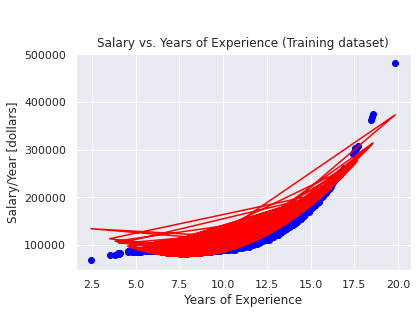

In [438]:
# #plotting the  testingdata
# #without sorting x, it will visualize like below

plt.scatter(x_test,y_test,color='blue')
plt.plot(x_test,lin_reg_model2.predict(poly.fit_transform(x_test)),color='red')
plt.ylabel('Salary/Year [dollars]')
plt.xlabel('Years of Experience')
plt.title('\n\nSalary vs. Years of Experience (Training dataset)')

# as the data x is not sorted.. it looks like a messy 

In [0]:
# sorting the data and then plotting

In [0]:
newx=pd.DataFrame({'col1':x_test.yoe.to_list(),'col2':y_test.to_list()})
newx.set_index('col1',inplace=True)
newx.sort_index(inplace=True,ascending=True)
newx.reset_index(inplace=True)

In [441]:
newx.head(10)

,col1,col2
0,2.450875,67253.57549
1,3.519210,78968.49772
2,3.834124,78724.08387
3,3.995191,81781.19310
4,4.055497,81047.22386
5,4.110645,83007.24597
6,4.544190,85700.05359
7,4.584837,87258.95727
8,4.613027,86028.02856
9,4.740262,87484.31323


In [0]:
newxx=newx[['col1']]
newyy=newx['col2']

In [443]:
newxx.shape

(600, 1)

Text(0.5, 1.0, '\n\nSalary vs. Years of Experience (Training dataset)')

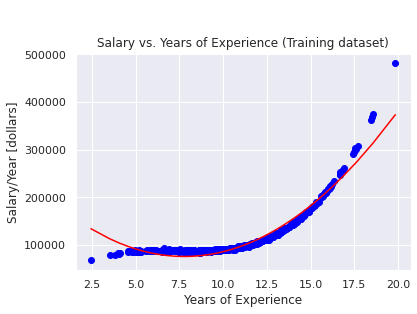

In [444]:
# #plotting the  testingdata
# #without sorting x, it will visualize like below

plt.scatter(newxx,newyy,color='blue')
plt.plot(newxx,lin_reg_model2.predict(poly.fit_transform(newxx)),color='red')
plt.ylabel('Salary/Year [dollars]')
plt.xlabel('Years of Experience')
plt.title('\n\nSalary vs. Years of Experience (Training dataset)')

## using a pipeline 

since we are doing 2 things,

1. first applying polynomialFeatures
2. then applying the lin. regression model

we can create a pipeline

In [0]:
from sklearn.pipeline import make_pipeline

In [0]:
from sklearn.preprocessing import  PolynomialFeatures as pf
from sklearn.linear_model import LinearRegression as lr

model1= pf(include_bias=False,degree=2)
model2=lr(fit_intercept=True)

In [0]:
#making the pipeline and fitting data
pipeline=make_pipeline(model1,model2)

In [0]:
x=data[['yoe']]
y=data['Salary']

x_train,x_test,y_train,y_test=tts(x,y,random_state=42,test_size=0.2)

In [451]:
pipeline.fit(x_train,y_train)

Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=2, include_bias=False,
                                    interaction_only=False, order='C')),
                ('linearregression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [0]:
#predicting
pred=pipeline.predict(x_test)

In [454]:
#evalutation of model : Accuracies
r2_score(y_test,pred),np.sqrt(mse(y_test,pred))

(0.9486824765577456, 9501.184421882552)